In [ ]:
from transformers import pipeline
import  matplotlib.pyplot as plt

In [ ]:
# Load EmoRoBERTa
model_name = "j-hartmann/emotion-english-distilroberta-base"
classifier = pipeline("text-classification", model=model_name, return_all_scores=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/fb_sentiment (1).csv'
df = pd.read_csv(file_path)

In [ ]:
df = df[['FBPost']].dropna().head(100)
df

,FBPost
0,Drug Runners and a U.S. Senator have somethin...
1,"Heres a single, to add, to Kindle. Just read t..."
2,If you tire of Non-Fiction.. Check out http://...
3,Ghost of Round Island is supposedly nonfiction.
4,Why is Barnes and Nobles version of the Kindle...
...,...
95,Love my Kindle! Best thing ever!!!
96,Agree with all the above - LOVE MY Kindle 3G! :)
97,I bought Kindles for 2 sisters who love to rea...
98,Love my kindle !


In [ ]:
# Predict emotion
def get_dominant_emotion(text):
    result = classifier(text[:512])  # truncate for long posts
    return max(result[0], key=lambda x: x['score'])['label']

df['Predicted_Emotion'] = df['FBPost'].apply(get_dominant_emotion)

In [ ]:
# Grouping
grouped = df.groupby('Predicted_Emotion')['FBPost'].apply(list).reset_index()


In [ ]:
grouped

,Predicted_Emotion,FBPost
0,anger,[Some people just love to complain about every...
1,disgust,[Meh. I think Singles are a bad idea. Big name...
2,joy,"[kindle is awesome! mines great, I love mine!!..."
3,neutral,[Drug Runners and a U.S. Senator have somethi...
4,sadness,[Not a fan of Kindle Singles. They clog up th...
5,surprise,[Why is Barnes and Nobles version of the Kindl...


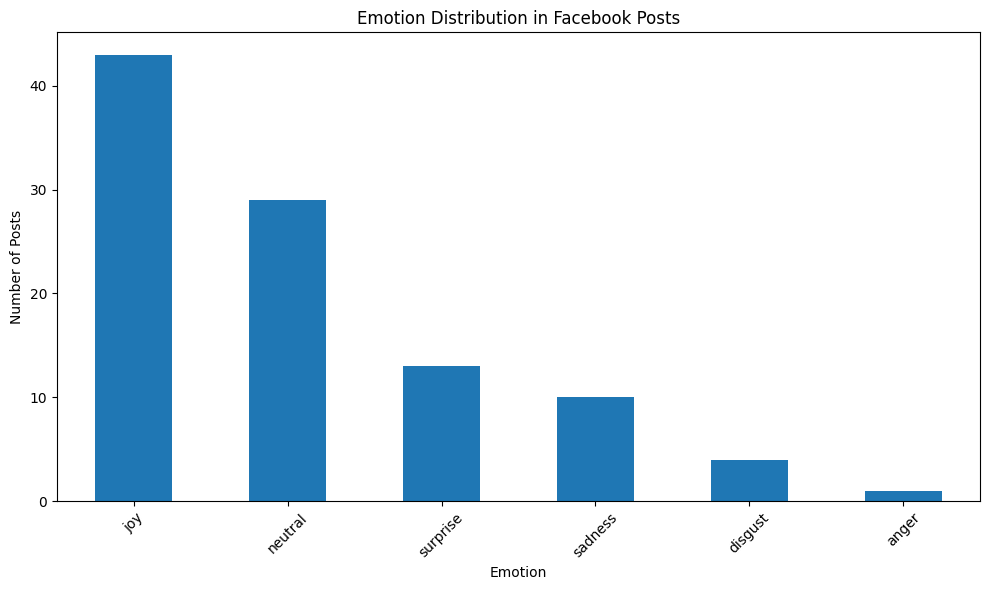

In [ ]:
# Visualization: Bar Chart
emotion_counts = df['Predicted_Emotion'].value_counts()
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title("Emotion Distribution in Facebook Posts")
plt.xlabel("Emotion")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("emotion_bar_chart.png")
plt.show()



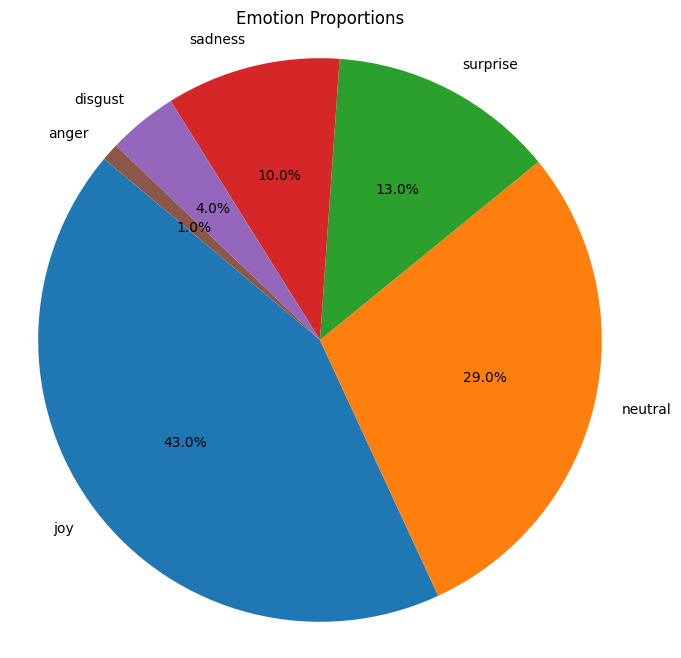

In [ ]:
# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Emotion Proportions")
plt.axis("equal")
plt.savefig("emotion_pie_chart.png")
plt.show()